# 2-D Visualization with Cluster Decoder

In [1]:
from qiskit.ignis.verification.topological_codes import RepetitionCode
from qiskit.ignis.verification.topological_codes import GraphDecoder

In [2]:
code = RepetitionCode(3,2)

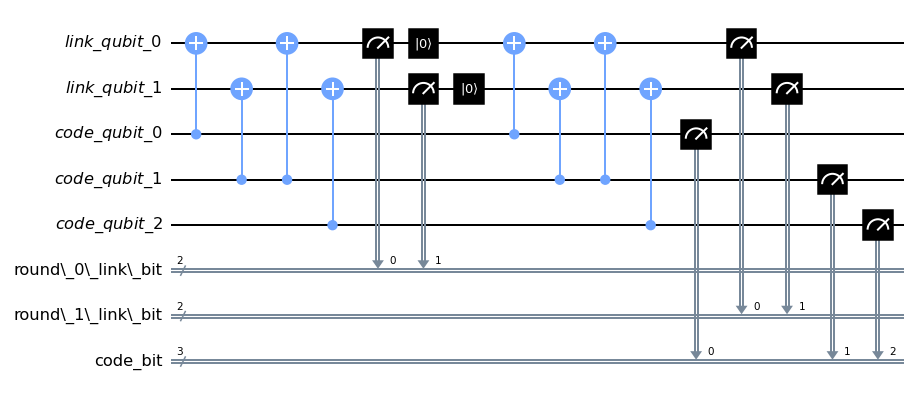

In [3]:
code.circuit['0'].draw('mpl')

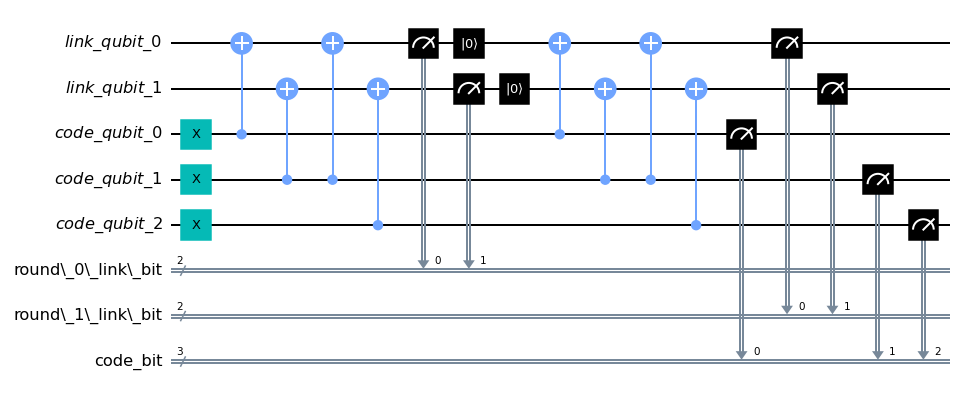

In [4]:
code.circuit['1'].draw('mpl',filename = 'Figure9.jpg')

In [5]:
from qiskit import Aer, execute
raw_results = {}
for log in ['0' , '1']:
    job = execute(code.circuit[log],Aer.get_backend('qasm_simulator'))
    raw_results[log] = job.result().get_counts()
    
for log in raw_results:
    print('Logical',log,':',raw_results[log],'\n')

Logical 0 : {'000 00 00': 1024} 

Logical 1 : {'111 00 00': 1024} 



In [6]:
process_results = code.process_results(raw_results)
process_results

{'0': {'0 0  00 00 00': 1024}, '1': {'1 1  00 00 00': 1024}}

## Error model to generate error or you may use results from quantum computer

In [7]:
from qiskit.providers.aer.noise import NoiseModel
from qiskit.providers.aer.noise.errors import pauli_error, depolarizing_error
from qiskit import Aer, execute

def get_noise(p_meas,p_gate):

    error_meas = pauli_error([('X',p_meas), ('I', 1 - p_meas)])
    error_gate1 = depolarizing_error(p_gate, 1)
    error_gate2 = error_gate1.tensor(error_gate1)

    noise_model = NoiseModel()
    noise_model.add_all_qubit_quantum_error(error_meas, "measure") # measurement error is applied to measurements
    noise_model.add_all_qubit_quantum_error(error_gate1, ["x"]) # single qubit gate error is applied to x gates
    noise_model.add_all_qubit_quantum_error(error_gate2, ["cx"]) # two qubit gate error is applied to cx gates
        
    return noise_model

def get_raw_results(code,noise_model=None):

    circuits = code.get_circuit_list()
    raw_results = {}
    for log in range(2):
        job = execute( circuits[log], Aer.get_backend('qasm_simulator'), noise_model=noise_model, shots = 8192)
        raw_results[str(log)] = job.result().get_counts(str(log))
    return raw_results
noise_model = get_noise(0.01,0.01)
raw_results = get_raw_results(code,noise_model)
    
process_result = code.process_results(raw_results)

In [8]:
for _ in raw_results:
    print('Logical',_,':',raw_results[_],'\n')

Logical 0 : {'000 00 00': 7044, '000 00 01': 159, '001 00 00': 97, '001 00 01': 2, '001 00 10': 2, '001 01 00': 31, '001 01 10': 1, '001 10 00': 1, '001 11 00': 1, '000 00 10': 134, '010 00 00': 107, '010 00 01': 6, '010 00 10': 3, '010 01 00': 41, '010 01 01': 3, '010 10 00': 5, '010 11 00': 35, '010 11 01': 36, '000 00 11': 5, '011 01 00': 1, '011 11 00': 1, '011 11 01': 1, '000 01 00': 137, '100 00 00': 108, '100 00 01': 2, '100 00 10': 3, '100 01 00': 2, '100 10 00': 43, '100 10 01': 3, '000 01 01': 3, '101 00 00': 5, '101 10 00': 1, '000 01 10': 3, '110 00 00': 2, '110 11 00': 1, '000 10 00': 153, '000 10 10': 5, '000 11 00': 5} 

Logical 1 : {'001 00 00': 3, '001 01 00': 1, '001 10 00': 1, '001 11 00': 2, '001 11 01': 1, '010 01 00': 2, '010 10 00': 2, '010 11 00': 1, '011 00 00': 93, '011 00 01': 4, '011 00 10': 2, '011 01 00': 4, '011 10 00': 43, '011 10 01': 1, '011 10 10': 41, '011 11 10': 1, '100 00 00': 4, '100 10 01': 1, '100 11 01': 1, '100 11 11': 2, '101 00 00': 104, '1

In [9]:
print(process_results)

{'0': {'0 0  00 00 00': 1024}, '1': {'1 1  00 00 00': 1024}}


## Choose any output string to draw it's graph and start decoding

In [10]:
Graph = GraphDecoder(code)

In [11]:
Error_Graph = Graph.make_error_graph('1 0  00 10 00')['0']

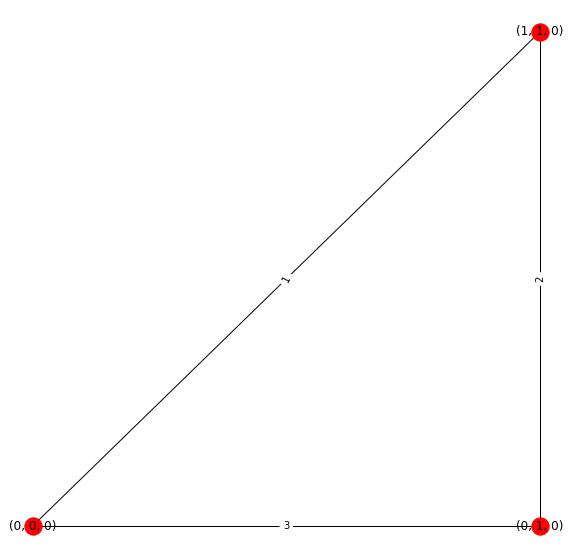

In [12]:
Graph.draw_2d_error_graph(Error_Graph)

In [13]:
[logical, Edgelist, nodelist]=Graph.cluster_decoding('1 0  00 10 00')

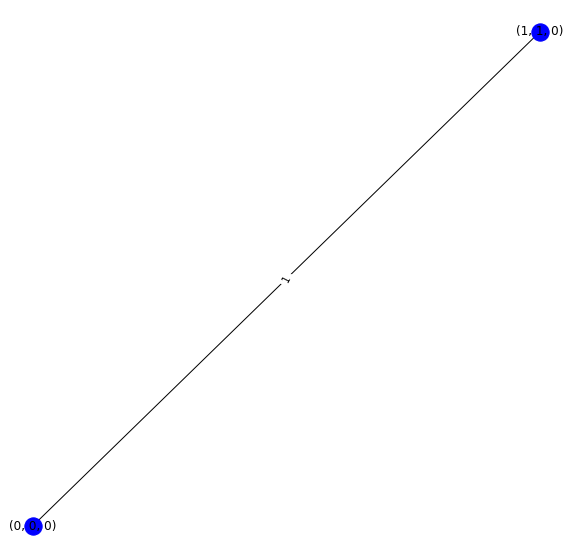

In [14]:
Graph.draw_2d_decoded_graph(Error_Graph,Edgelist,nodelist)